# Data of Fiscal year 2015 with consist of quarter Fiscal year 2014.

### As financial year start from April 1 to 31st March

#### Part 1.1

In [197]:
import pandas as pd 
import numpy as np 
import datetime
from datetime import date
from datetime import datetime

In [198]:
_tcs_infy = pd.read_csv(r"C:\Users\Acer\Desktop\01-01-2015-TO-31-12-2015TCS&INFY.csv 1.csv")

In [199]:
_tcs_infy.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty'],
      dtype='object')

In [200]:
_tcs_infy.describe().head()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02,4.980000e+02,498.000000,4.980000e+02,498.000000
mean,2043.094779,2047.640261,2066.149297,2023.644378,2044.375904,2044.162550,2044.595582,2.070211e+06,3.594301e+09,79453.941767,1.363844e+06,66.565281
std,622.985417,624.273670,628.433114,618.402416,623.091451,623.010499,622.958112,1.759975e+06,2.304106e+09,43309.473159,1.019966e+06,9.430002
min,937.500000,941.000000,952.100000,932.650000,935.500000,937.500000,941.180000,4.986500e+04,1.298584e+08,1.000000,0.000000e+00,0.000000
25%,1149.525000,1150.000000,1162.425000,1132.575000,1147.625000,1149.525000,1147.160000,1.002918e+06,2.320811e+09,53267.750000,6.762732e+05,61.490000


In [201]:
_tcs_infy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 15 columns):
Symbol                    498 non-null object
Series                    498 non-null object
Date                      498 non-null object
Prev Close                498 non-null float64
Open Price                498 non-null float64
High Price                498 non-null float64
Low Price                 498 non-null float64
Last Price                498 non-null float64
Close Price               498 non-null float64
Average Price             498 non-null float64
Total Traded Quantity     498 non-null int64
Turnover                  498 non-null float64
No. of Trades             498 non-null int64
Deliverable Qty           498 non-null int64
% Dly Qt to Traded Qty    498 non-null float64
dtypes: float64(9), int64(3), object(3)
memory usage: 58.4+ KB


In [202]:
_nifty = pd.read_csv(r"C:\Users\Acer\Desktop\dataNIFTYIT.csv")

In [203]:
_nifty.describe().head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
count,248.000000,248.000000,248.000000,248.000000,2.480000e+02,248.000000
mean,11601.495968,11673.756250,11505.632056,11585.626613,1.383053e+07,1354.939960
std,468.997883,472.763542,462.203401,466.678465,6.401886e+06,546.153927
min,10840.650000,10950.250000,10759.850000,10798.250000,7.952400e+05,82.720000
25%,11214.762500,11268.200000,11133.312500,11210.200000,9.304708e+06,943.850000


In [204]:
_nifty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
Date                 248 non-null object
Open                 248 non-null float64
High                 248 non-null float64
Low                  248 non-null float64
Close                248 non-null float64
Shares Traded        248 non-null int64
Turnover (Rs. Cr)    248 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.6+ KB


In [205]:
_tcs_infy["Date"]= pd.to_datetime(_tcs_infy["Date"])

In [206]:
_tcs_infy.Date.dtype # Checking the data

dtype('<M8[ns]')

In [207]:
def strd(Date):
        return datetime.date(pd.to_datetime(datetime.date(datetime.strptime(str(Date), '%Y-%m-%d')))) #Creating a function to change the data type

In [209]:
def weeks(Date):
    #print(Date)
    Date1 = strd(Date)
    #print(Date1)
    if Date1 <= strd('2015-1-28'):
        return ("week4")
    elif Date1 >strd('2015-1-28') and Date1  <= strd('2015-4-22'):
        return ("week16")
    elif Date1 > strd('2015-4-22') and Date1  <= strd('2015-7-15'):
        return ("week28")
    elif Date1 > strd('2015-7-15') and Date1 <= strd('2015-10-7'):
        return ("week40")
    elif Date1 > strd('2015-10-7') and Date1  <= strd('2015-12-31'):
        return ("week52")
    else:
        pass # Creating function and applying condition as per 

In [210]:
strd('2015-1-25')

datetime.date(2015, 1, 25)

In [211]:
weeks('2015-4-25')
weeks('2015-11-12')

'week52'

In [212]:
week = []
i = 1
count = 0
#rint(_tcs_infy.Date)
while count < 498:
    #rint(pd.to_datetime(_tcs_infy.Date[count]))
    temp=_tcs_infy.Date[count]
#print (str.split(str(temp),' ')[0])
    week.append(weeks(str.split(str(temp),' ')[0]))
    count += 1

In [213]:
print(len(week))
#print(week)

498


In [214]:
week = pd.DataFrame(week)

In [215]:
_tcs_infy['week'] = week

In [216]:
_tcs_infy.head(5)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,week
0,TCS,EQ,2015-01-01,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+08,8002,52870,28.83,week4
1,TCS,EQ,2015-01-02,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+09,27585,309350,66.83,week4
2,TCS,EQ,2015-01-05,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+09,43234,456728,52.07,week4
3,TCS,EQ,2015-01-06,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+09,84503,714306,58.94,week4
4,TCS,EQ,2015-01-07,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+09,101741,886368,67.24,week4


In [217]:
_tcs_infy.to_csv('tcsinfyc.csv') # saving data to new csv file 


In [218]:
_nifty["Date"]= pd.to_datetime(_nifty["Date"])

In [219]:
_nifty.Date.dtype  # Checking the data type

dtype('<M8[ns]')

In [220]:
def strd(Date):
        return datetime.date(pd.to_datetime(datetime.date(datetime.strptime(str(Date), '%Y-%m-%d')))) #Creating a function to change the data type

In [221]:
def weeks(Date):
    #print(Date)
    Date1 = strd(Date)
    #print(Date1)
    if Date1 <= strd('2015-1-28'):
        return ("week4")
    elif Date1 >strd('2015-1-28') and Date1  <= strd('2015-4-22'):
        return ("week16")
    elif Date1 > strd('2015-4-22') and Date1  <= strd('2015-7-15'):
        return ("week28")
    elif Date1 > strd('2015-7-15') and Date1 <= strd('2015-10-7'):
        return ("week40")
    elif Date1 > strd('2015-10-7') and Date1  <= strd('2015-12-31'):
        return ("week52")
    else:
        pass # Creating function and applying condition as per 

In [222]:
strd('2015-1-25')

datetime.date(2015, 1, 25)

In [227]:
week = []
i = 1
count = 0
#rint(_tcs_infy.Date)
while count < 248:
    #rint(pd.to_datetime(_tcs_infy.Date[count]))
    temp1=_nifty.Date[count]
    #print (str.split(str(temp),' ')[0])
    week.append(weeks(str.split(str(temp1),' ')[0]))
    count += 1
print(len(week))
#print(week)

248


In [232]:
week = pd.DataFrame(week)

In [233]:
_nifty['week'] = week

In [234]:
_nifty.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),week
243,2015-12-24,11193.25,11197.50,11152.85,11184.90,2927864,318.27,week52
244,2015-12-28,11152.70,11303.05,11146.85,11271.80,8055590,1001.90,week52
245,2015-12-29,11257.05,11287.50,11206.60,11253.45,6024174,662.62,week52
246,2015-12-30,11247.35,11263.60,11100.10,11117.60,6564991,707.19,week52
247,2015-12-31,11113.00,11233.85,11113.00,11212.55,8197040,859.05,week52


In [237]:
_nifty.to_csv('nifty1.csv')

In [236]:
_tcs_infy.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty', 'week'],
      dtype='object')

In [238]:
_tcs_infy

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,week
0,TCS,EQ,2015-01-01,2558.25,2567.00,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+08,8002,52870,28.83,week4
1,TCS,EQ,2015-01-02,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+09,27585,309350,66.83,week4
2,TCS,EQ,2015-01-05,2579.45,2581.00,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+09,43234,456728,52.07,week4
3,TCS,EQ,2015-01-06,2540.25,2529.10,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+09,84503,714306,58.94,week4
4,TCS,EQ,2015-01-07,2446.60,2470.00,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+09,101741,886368,67.24,week4
5,TCS,EQ,2015-01-08,2417.70,2442.40,2449.00,2420.55,2446.00,2443.80,2434.81,782704,1.905739e+09,47699,450768,57.59,week4
6,TCS,EQ,2015-01-09,2443.80,2455.00,2519.90,2450.00,2510.00,2512.30,2490.01,1598821,3.981082e+09,81743,865777,54.15,week4
7,TCS,EQ,2015-01-12,2512.30,2517.00,2528.00,2480.25,2527.95,2509.70,2497.82,798003,1.993266e+09,58810,451228,56.54,week4
8,TCS,EQ,2015-01-13,2509.70,2520.00,2530.40,2480.10,2498.00,2497.90,2509.40,734216,1.842440e+09,49993,386133,52.59,week4
9,TCS,EQ,2015-01-14,2497.90,2516.00,2531.80,2500.50,2525.05,2521.95,2517.54,893548,2.249546e+09,69237,498193,55.75,week4


### TCS & INFY [Moving Averages]

In [30]:
mov_avr_tcs_week4 = _tcs_infy[(_tcs_infy["Date"]<= '2015-1-28') & (_tcs_infy["Symbol"]=="TCS")]["Close Price"].mean()
mov_avr_infy_week4= _tcs_infy[(_tcs_infy["Date"]<= '2015-1-28') & (_tcs_infy["Symbol"]=="INFY")]["Close Price"].mean()    
mov_avr_tcs_week16= _tcs_infy[(_tcs_infy["Date"] >'2015-1-28') & (_tcs_infy["Date"]<= '2015-4-22') & (_tcs_infy["Symbol"]=="TCS")]["Close Price"].mean()
mov_avr_infy_week16=_tcs_infy[(_tcs_infy["Date"] >'2015-1-28') & (_tcs_infy["Date"]<= '2015-4-22') & (_tcs_infy["Symbol"]=="INFY")]["Close Price"].mean()
mov_avr_tcs_week28=_tcs_infy[(_tcs_infy["Date"] >'2015-4-22') & (_tcs_infy["Date"]<= '2015-7-15') & (_tcs_infy["Symbol"]=="TCS")]["Close Price"].mean()
mov_avr_infy_week28=_tcs_infy[(_tcs_infy["Date"] >'2015-4-22') & (_tcs_infy["Date"]<= '2015-7-15') & (_tcs_infy["Symbol"]=="INFY")]["Close Price"].mean()
mov_avr_tcs_week40=_tcs_infy[(_tcs_infy["Date"] >'2015-7-15') & (_tcs_infy["Date"]<= '2015-10-7') & (_tcs_infy["Symbol"]=="TCS")]["Close Price"].mean()
mov_avr_infy_week40=_tcs_infy[(_tcs_infy["Date"] >'2015-7-15') & (_tcs_infy["Date"]<= '2015-10-7') & (_tcs_infy["Symbol"]=="INFY")]["Close Price"].mean()
mov_avr_tcs_week52=_tcs_infy[(_tcs_infy["Date"] >'2015-10-7') & (_tcs_infy["Date"]<= '2015-12-31') & (_tcs_infy["Symbol"]=="TCS")]["Close Price"].mean()
mov_avr_infy_week52=_tcs_infy[(_tcs_infy["Date"] >'2015-10-7') & (_tcs_infy["Date"]<= '2015-12-31') & (_tcs_infy["Symbol"]=="INFY")]["Close Price"].mean()

In [31]:
#Moving average
print(mov_avr_tcs_week4)
print(mov_avr_infy_week4)
print(mov_avr_tcs_week16)
print(mov_avr_infy_week16)
print(mov_avr_tcs_week28)
print(mov_avr_infy_week28)
print(mov_avr_tcs_week40)
print(mov_avr_infy_week40)
print(mov_avr_tcs_week52)
print(mov_avr_infy_week52)

2508.9736842105267
2085.4921052631585
2587.566071428571
2224.9133928571423
2550.4389830508476
1610.4116666666669
2578.9991379310345
1100.8456140350877
2444.319298245614
1095.478947368421


### NIFTY [Moving Averages]

In [32]:
mov_avr_nifty_week4 = _nifty[(_nifty["Date"]<= '2015-1-28')]["Close"].mean()   
mov_avr_nifty_week16= _nifty[(_nifty["Date"] >'2015-1-28') & (_nifty["Date"]<= '2015-4-22')]["Close"].mean()
mov_avr_nifty_week28=_nifty[(_nifty["Date"] >'2015-4-22') & (_nifty["Date"]<= '2015-7-15')]["Close"].mean()
mov_avr_nifty_week40=_nifty[(_nifty["Date"] >'2015-7-15') & (_nifty["Date"]<= '2015-10-7')]["Close"].mean()
mov_avr_nifty_week52=_nifty[(_nifty["Date"] >'2015-10-7') & (_nifty["Date"]<= '2015-12-31')]["Close"].mean()

In [33]:
#Moving average
print(mov_avr_nifty_week4)
print(mov_avr_nifty_week16)
print(mov_avr_nifty_week28)
print(mov_avr_nifty_week40)
print(mov_avr_nifty_week52)

11500.563157894738
12252.784821428573
11235.974576271186
11634.748245614033
11271.326315789473


### part-1, 1.2

In [53]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 1, 8
import matplotlib.pyplot as plt 
%matplotlib inline

In [35]:
stock = pd.read_csv(r"C:\Users\Acer\Desktop\01-01-2015-TO-31-12-2015TCS&INFY.csv 1.csv",parse_dates=['Date'], index_col='Date')

In [36]:
index = pd.read_csv(r"C:\Users\Acer\Desktop\dataNIFTYIT.csv",parse_dates=['Date'], index_col='Date')

In [37]:
stock.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty'],
      dtype='object')

In [38]:
index.columns

Index(['Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (Rs. Cr)'], dtype='object')

In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
stock.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=498, freq=None)

In [41]:
index.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=248, freq=None)

#### Moving window [STOCK] 

In [42]:
def rolling_window(timeseries):
    
    rol_wind_mean = pd.rolling_mean(timeseries, window=10)
    rol_wind_std = pd.rolling_std(timeseries, window=10)

    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rol_wind_mean, color='red', label='Rolling Mean')
    std = plt.plot(rol_wind_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print ('Results of Dickey-Fuller Test')
    series_test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(series_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in series_test[4].items():
        result['Critical Value (%s)'%key] = value
    print(result)

In [46]:
stock_out = stock['Close Price']

In [51]:
stock_out.head()

Date
2015-01-01    2545.55
2015-01-02    2579.45
2015-01-05    2540.25
2015-01-06    2446.60
2015-01-07    2417.70
Name: Close Price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()


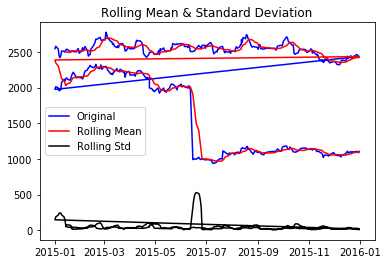

Results of Dickey-Fuller Test
Test Statistic                  -0.620744
p-value                          0.866226
#Lags Used                       0.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64


In [54]:
rolling_window(stock_out)

In [55]:
def rolling_window(timeseries):
    
    rol_wind_mean = pd.rolling_mean(timeseries, window=75)
    rol_wind_std = pd.rolling_std(timeseries, window=75)

    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rol_wind_mean, color='red', label='Rolling Mean')
    std = plt.plot(rol_wind_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print ('Results of Dickey-Fuller Test')
    series_test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(series_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in series_test[4].items():
        result['Critical Value (%s)'%key] = value
    print(result)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=75,center=False).mean()
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=75,center=False).std()


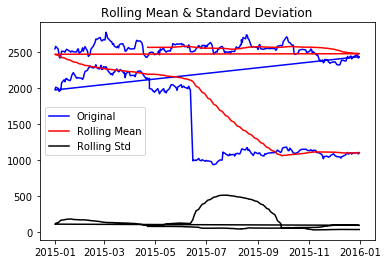

Results of Dickey-Fuller Test
Test Statistic                  -0.620744
p-value                          0.866226
#Lags Used                       0.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64


In [56]:
rolling_window(stock_out)

#### Moving Window Index

In [57]:
def rolling_window(timeseries):
    
    rol_wind_mean = pd.rolling_mean(timeseries, window=10)
    rol_wind_std = pd.rolling_std(timeseries, window=10)

    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rol_wind_mean, color='red', label='Rolling Mean')
    std = plt.plot(rol_wind_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print ('Results of Dickey-Fuller Test')
    series_test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(series_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in series_test[4].items():
        result['Critical Value (%s)'%key] = value
    print(result)

In [58]:
index_out = index['Close']

In [59]:
index_out.head()

Date
2015-01-01    11215.70
2015-01-02    11372.10
2015-01-05    11248.55
2015-01-06    10959.90
2015-01-07    10916.00
Name: Close, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()


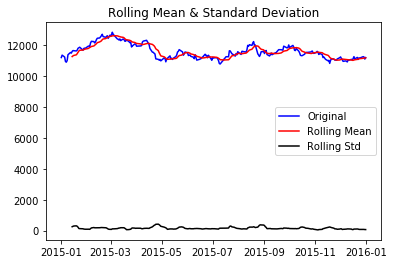

Results of Dickey-Fuller Test
Test Statistic                  -2.151815
p-value                          0.224196
#Lags Used                       0.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


In [60]:
rolling_window(index_out)

In [62]:
def rolling_window(timeseries):
    
    rol_wind_mean = pd.rolling_mean(timeseries, window=75)
    rol_wind_std = pd.rolling_std(timeseries, window=75)

    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rol_wind_mean, color='red', label='Rolling Mean')
    std = plt.plot(rol_wind_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print ('Results of Dickey-Fuller Test')
    series_test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(series_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in series_test[4].items():
        result['Critical Value (%s)'%key] = value
    print(result)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=75,center=False).mean()
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=75,center=False).std()


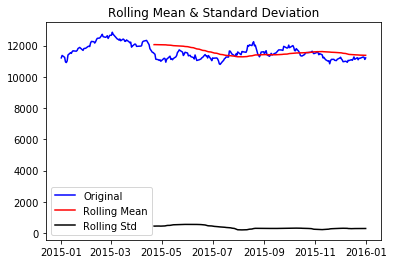

Results of Dickey-Fuller Test
Test Statistic                  -2.151815
p-value                          0.224196
#Lags Used                       0.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


In [63]:
rolling_window(index_out)

#### Part-1, 3.1

In [64]:
#_tcs_infy["Total Traded Quantity"]= np.array.(_tcs_infy["Total Traded Quantity"])

In [65]:
len(_tcs_infy["Total Traded Quantity"])

498

In [66]:
"""while siz=len(_tcs_infy["Total Traded Quantity"]):
x = _tcs_infy["Total Traded Quantity"][0]
y = +1"""

'while siz=len(_tcs_infy["Total Traded Quantity"]):\nx = _tcs_infy["Total Traded Quantity"][0]\ny = +1'

In [67]:
bool_ser = []
den = list(_tcs_infy["Total Traded Quantity"])

i = den[1]
i = i +1
j = i + 1


count = 0
while count <= 498:
    if ((j-i)*0.1) >i:
        bool_ser.append(0)
    elif ((j-i)*0.1) < i:
        bool_ser.append(1)
    count += 1

In [68]:
bool_ser = pd.DataFrame(bool_ser)

In [69]:
_tcs_infy['Volume_Shock'] = bool_ser

In [70]:
_tcs_infy.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,week,Volume_Shock
0,TCS,EQ,2015-01-01,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+08,8002,52870,28.83,week4,1
1,TCS,EQ,2015-01-02,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+09,27585,309350,66.83,week4,1
2,TCS,EQ,2015-01-05,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+09,43234,456728,52.07,week4,1
3,TCS,EQ,2015-01-06,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+09,84503,714306,58.94,week4,1
4,TCS,EQ,2015-01-07,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+09,101741,886368,67.24,week4,1


In [74]:
len(_nifty["Shares Traded"])

248

In [75]:
bool_ser = []
den = list(_nifty["Shares Traded"])

i = den[1]
i = i +1
j = i + 1


count = 0
while count <= 247:
    if ((j-i)*0.1) >i:
        bool_ser.append(0)
    elif ((j-i)*0.1) < i:
        bool_ser.append(1)
    count += 1

In [76]:
_nifty['Volume_Shock'] = bool_ser

In [77]:
_nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),week,Volume_Shock
0,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,357.51,week52,1
1,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,964.56,week52,1
2,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1059.00,week52,1
3,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1364.50,week52,1
4,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1203.44,week52,1


In [78]:
_nifty.count()

Date                 248
Open                 248
High                 248
Low                  248
Close                248
Shares Traded        248
Turnover (Rs. Cr)    248
week                 248
Volume_Shock         248
dtype: int64

### Part-1, 3.2

In [79]:
lr = []
den = list(_tcs_infy["Close Price"])

i = den[0]
i = i +1
j = i + 1


count = 0
while count <= 498:
    if (((j-i)/j)*100) >2:
        lr.append(0)
    elif (((j-i)/j)*100) < 2:
        lr.append(1)
    count += 1

In [80]:
lr = pd.DataFrame(lr)

In [81]:
_tcs_infy['price_Shock'] = lr

In [82]:
_tcs_infy.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,week,Volume_Shock,price_Shock
0,TCS,EQ,2015-01-01,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+08,8002,52870,28.83,week4,1,1
1,TCS,EQ,2015-01-02,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+09,27585,309350,66.83,week4,1,1
2,TCS,EQ,2015-01-05,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+09,43234,456728,52.07,week4,1,1
3,TCS,EQ,2015-01-06,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+09,84503,714306,58.94,week4,1,1
4,TCS,EQ,2015-01-07,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+09,101741,886368,67.24,week4,1,1


In [83]:
lr = []
den = list(_nifty["Close"])

i = den[0]
i = i +1
j = i + 1


count = 0
while count <= 247:
    if (((j-i)/j)*100) >2:
        lr.append(0)
    elif (((j-i)/j)*100) < 2:
        lr.append(1)
    count += 1

In [84]:
_nifty['price_Shock'] = lr

In [85]:
_nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),week,Volume_Shock,price_Shock
0,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,357.51,week52,1,1
1,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,964.56,week52,1,1
2,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1059.00,week52,1,1
3,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1364.50,week52,1,1
4,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1203.44,week52,1,1


#### part-1 3.3

In [86]:
lr = pd.DataFrame(lr)

In [87]:
_tcs_infy['Pricing black swan'] = lr

In [88]:
_tcs_infy.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,week,Volume_Shock,price_Shock,Pricing black swan
0,TCS,EQ,2015-01-01,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+08,8002,52870,28.83,week4,1,1,1.0
1,TCS,EQ,2015-01-02,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+09,27585,309350,66.83,week4,1,1,1.0
2,TCS,EQ,2015-01-05,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+09,43234,456728,52.07,week4,1,1,1.0
3,TCS,EQ,2015-01-06,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+09,84503,714306,58.94,week4,1,1,1.0
4,TCS,EQ,2015-01-07,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+09,101741,886368,67.24,week4,1,1,1.0


In [89]:
lr = pd.DataFrame(lr)

In [90]:
_nifty['Pricing black swan'] = lr

In [91]:
_nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),week,Volume_Shock,price_Shock,Pricing black swan
0,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,357.51,week52,1,1,1
1,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,964.56,week52,1,1,1
2,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1059.00,week52,1,1,1
3,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1364.50,week52,1,1,1
4,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1203.44,week52,1,1,1


## Part 2 

In [95]:
%%!
pip install bokeh 

['Requirement already satisfied: bokeh in c:\\programdata\\anaconda3\\lib\\site-packages',
 'You are using pip version 9.0.1, however version 18.1 is available.',
 "You should consider upgrading via the 'python -m pip install --upgrade pip' command."]

In [96]:
import bokeh # trial

In [239]:
vis_tcs_infy  = pd.read_csv(r"C:\Users\Acer\tcsinfy.csv")

In [240]:
vis_nifty_it = pd.read_csv(r"C:\Users\Acer\nifty.csv")

In [243]:
vis_tcs_infy.head() 

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,week,week_num
0,0,TCS,EQ,1/1/2015,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+08,8002,52870,28.83,week 4,4
1,1,TCS,EQ,1/2/2015,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+09,27585,309350,66.83,week 4,4
2,2,TCS,EQ,1/5/2015,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+09,43234,456728,52.07,week 4,4
3,3,TCS,EQ,1/6/2015,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+09,84503,714306,58.94,week 4,4
4,4,TCS,EQ,1/7/2015,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+09,101741,886368,67.24,week 4,4


In [242]:
vis_nifty_it.head()

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),week,week_num
0,247,12/31/2015,11113.00,11233.85,11113.00,11212.55,8197040,859.05,week 52,52
1,246,12/30/2015,11247.35,11263.60,11100.10,11117.60,6564991,707.19,week 52,52
2,245,12/29/2015,11257.05,11287.50,11206.60,11253.45,6024174,662.62,week 52,52
3,244,12/28/2015,11152.70,11303.05,11146.85,11271.80,8055590,1001.90,week 52,52
4,243,12/24/2015,11193.25,11197.50,11152.85,11184.90,2927864,318.27,week 52,52


In [244]:
vis_tcs_infy.columns

Index(['Unnamed: 0', 'Symbol', 'Series', 'Date', 'Prev Close', 'Open Price',
       'High Price', 'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty', 'week', 'week_num'],
      dtype='object')

In [246]:
vis_nifty_it.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover (Rs. Cr)', 'week', 'week_num'],
      dtype='object')

In [247]:
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.palettes import Spectral11, colorblind, Inferno, BuGn, brewer
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource,LinearColorMapper,BasicTicker, PrintfTickFormatter, ColorBar

In [250]:
command = "hover,save,pan,box_zoom,reset,wheel_zoom,tap"
p = figure(plot_height=350,
    title="timeseries plot of close prices of stocks",
    tools=command,
    toolbar_location='above')

p.vbar(x=vis_nifty_it["week_num"], top=vis_nifty_it["Close"], width=0.9)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.xaxis.axis_label = 'week_num'
p.yaxis.axis_label = 'Close Prices'
p.select_one(HoverTool).tooltips = [
    ('week_num', '@x'),
    ('Close Prices', '@top')
    
]
show(p)

In [251]:
command = "hover,save,pan,box_zoom,reset,wheel_zoom,tap"
p = figure(plot_height=350,
    title="timeseries plot of close prices of stocks",
    tools=command,
    toolbar_location='above')

p.vbar(x=vis_tcs_infy["week_num"], top=vis_tcs_infy["Close Price"], width=0.9)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.xaxis.axis_label = 'week_num'
p.yaxis.axis_label = 'Close Prices'
p.select_one(HoverTool).tooltips = [
    ('week_num', '@x'),
    ('Close Prices', '@top')
    
]
show(p)

#### Part 3 (Optional)

# Modelling 

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [221]:
model = pd.read_csv(r"C:\Users\Acer\Desktop\01-01-2015-TO-31-12-2015TCS&INFY.csv 1.csv")

In [222]:
model.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,1-Jan-15,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+08,8002,52870,28.83
1,TCS,EQ,2-Jan-15,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+09,27585,309350,66.83
2,TCS,EQ,5-Jan-15,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+09,43234,456728,52.07
3,TCS,EQ,6-Jan-15,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+09,84503,714306,58.94
4,TCS,EQ,7-Jan-15,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+09,101741,886368,67.24


In [223]:
model.info()
model.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 15 columns):
Symbol                    498 non-null object
Series                    498 non-null object
Date                      498 non-null object
Prev Close                498 non-null float64
Open Price                498 non-null float64
High Price                498 non-null float64
Low Price                 498 non-null float64
Last Price                498 non-null float64
Close Price               498 non-null float64
Average Price             498 non-null float64
Total Traded Quantity     498 non-null int64
Turnover                  498 non-null float64
No. of Trades             498 non-null int64
Deliverable Qty           498 non-null int64
% Dly Qt to Traded Qty    498 non-null float64
dtypes: float64(9), int64(3), object(3)
memory usage: 58.4+ KB


,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02,4.980000e+02,498.000000,4.980000e+02,498.000000
mean,2043.094779,2047.640261,2066.149297,2023.644378,2044.375904,2044.162550,2044.595582,2.070211e+06,3.594301e+09,79453.941767,1.363844e+06,66.565281
std,622.985417,624.273670,628.433114,618.402416,623.091451,623.010499,622.958112,1.759975e+06,2.304106e+09,43309.473159,1.019966e+06,9.430002
min,937.500000,941.000000,952.100000,932.650000,935.500000,937.500000,941.180000,4.986500e+04,1.298584e+08,1.000000,0.000000e+00,0.000000
25%,1149.525000,1150.000000,1162.425000,1132.575000,1147.625000,1149.525000,1147.160000,1.002918e+06,2.320811e+09,53267.750000,6.762732e+05,61.490000
50%,2318.700000,2323.950000,2339.950000,2303.650000,2322.100000,2322.250000,2322.220000,1.586690e+06,3.145607e+09,72291.000000,1.064716e+06,68.115000
75%,2542.062500,2548.750000,2566.500000,2520.000000,2540.225000,2542.062500,2540.482500,2.608385e+06,4.285333e+09,94810.250000,1.770661e+06,72.422500
max,2776.000000,2788.000000,2812.100000,2721.900000,2785.100000,2776.000000,2763.040000,1.915506e+07,2.285439e+10,408583.000000,9.575992e+06,100.000000


In [225]:
model.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty'],
      dtype='object')

In [226]:
x = model[['Prev Close', 'High Price','Low Price', 'Last Price', 'Close Price', 'Average Price','Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']]
y = model['Open Price']

In [240]:
from sklearn.model_selection import train_test_split

In [242]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [243]:
from sklearn.linear_model import LinearRegression

In [244]:
lm = LinearRegression()

In [245]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [246]:
print(lm.intercept_)

4.25995441816


In [248]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Prev Close,3.302880e-02
High Price,1.099763e+00
Low Price,1.096498e+00
Last Price,-2.602347e-02
Close Price,-6.093215e-01
Average Price,-5.961634e-01
Total Traded Quantity,-3.505617e-06
Turnover,1.391378e-09
No. of Trades,3.560425e-05
Deliverable Qty,1.010385e-06


In [249]:
predictions = lm.predict(X_test)

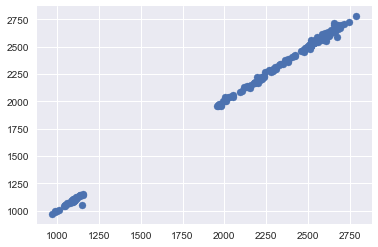

In [250]:
plt.scatter(y_test,predictions)

In [251]:
from sklearn import metrics

In [252]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))   

MAE: 9.71420166216
MSE: 231.477528899
RMSE: 15.2143855906
